In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy as sp

from scipy.optimize import curve_fit, minimize

In [6]:
from google.colab import files
files.upload()

Saving bank.csv to bank (1).csv


{'bank.csv': b'age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit\n59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes\n56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes\n41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes\n55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes\n54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes\n42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes\n56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes\n60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes\n37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes\n28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes\n38,admin.,single,secondary,no,100,yes,n

In [7]:
source_df = pd.read_csv('bank.csv')

In [8]:
source_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


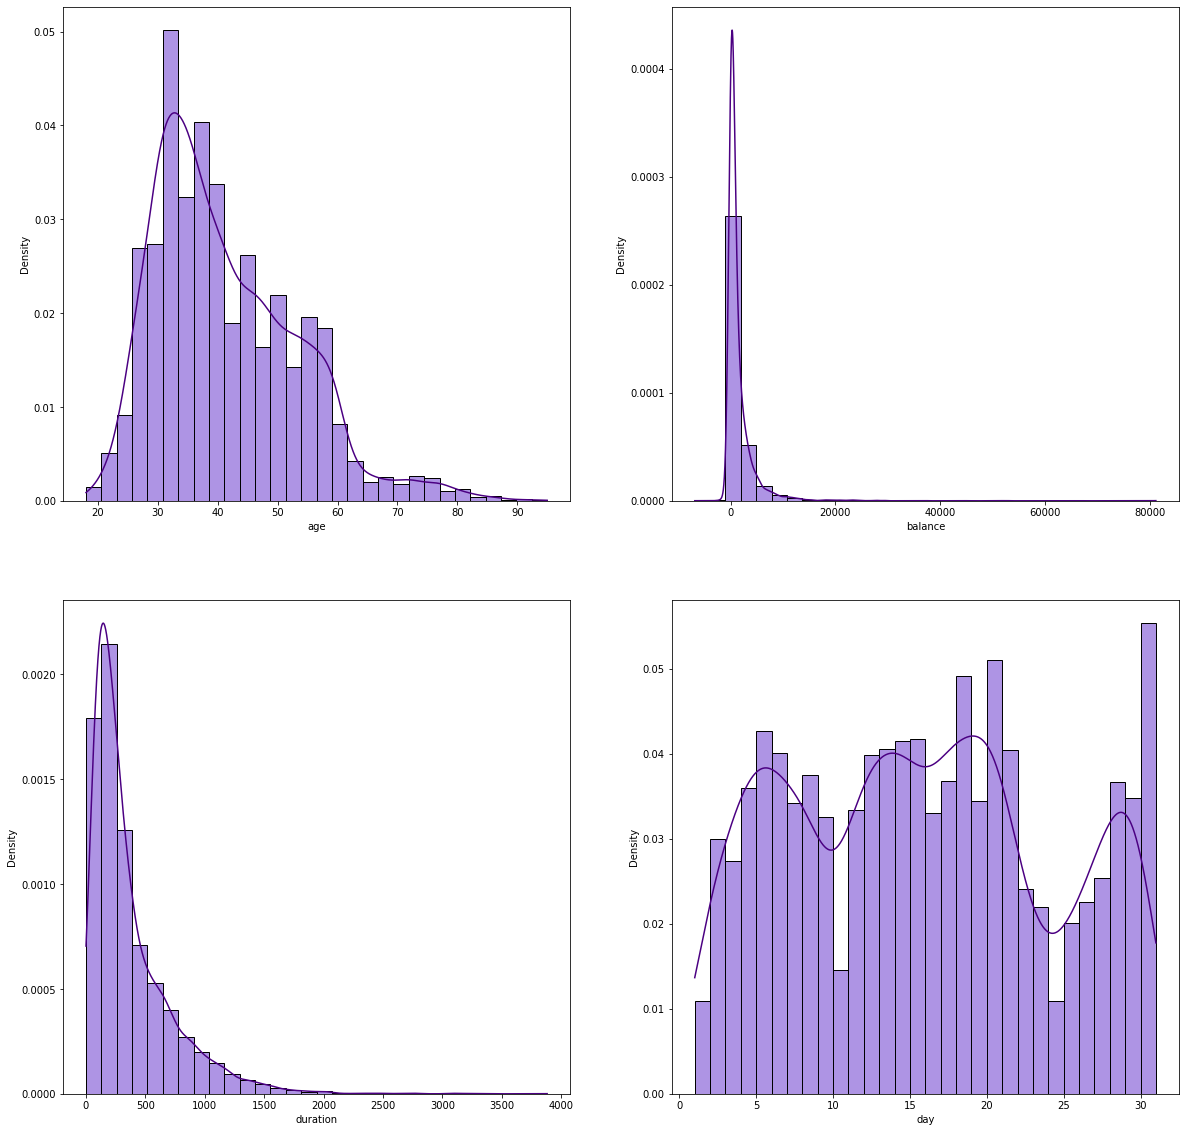

In [9]:
col_names = [
        'age',
        'balance', 
        'duration', 
        'day']

fig, axes = plt.subplots(2, 2, figsize=(20, 20))
col_idx = 0
for i in range(2):
    for j in range(2):
        col_name = col_names[col_idx]

        kernel = sp.stats.gaussian_kde(source_df[col_name])
        min_amount, max_amount = source_df[col_name].min(), source_df[col_name].max()
        x = np.linspace(min_amount, max_amount, len(source_df[col_name]))
        kde_values = kernel(x)
        sns.histplot(source_df[col_name], kde=False, bins=30, stat='density', ax=axes[i, j], palette='Set3', color = 'mediumpurple')
        axes[i, j].plot(x, kde_values, c = 'indigo')
        
        col_idx += 1

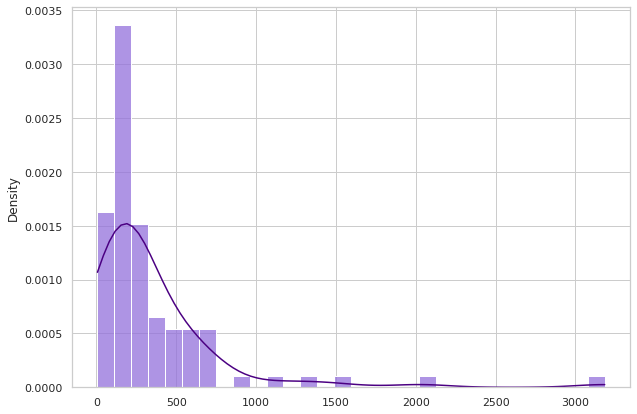

In [35]:
plt.figure(figsize=(10,7))
df = source_df.duration.sample(n = 65+22, random_state = 456).to_numpy()
kernel = sp.stats.gaussian_kde(df)
min_amount, max_amount = df.min(), df.max()
x = np.linspace(min_amount, max_amount, len(df))
kde_values = kernel(x)
sns.histplot(df, kde=False, bins=30, stat='density', palette='Set3', color = 'mediumpurple')
plt.plot(x, kde_values, c = 'indigo')

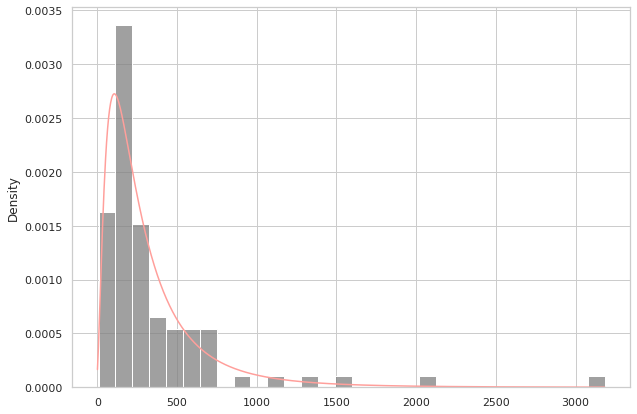

In [36]:
plt.figure(figsize=(10,7))
sns.set_theme(style='whitegrid', palette='pastel')
sns.histplot(df, kde=False, bins=30, stat='density', palette='Set3', color = 'grey')
max_amount = df.max()
x = np.linspace(0, max_amount, 1000)
mle_params = sp.stats.lognorm.fit(df, loc=1.1, scale=1.1)
pdf_mle = sp.stats.lognorm.pdf(x, *mle_params)
plt.plot(x, pdf_mle, color='r')

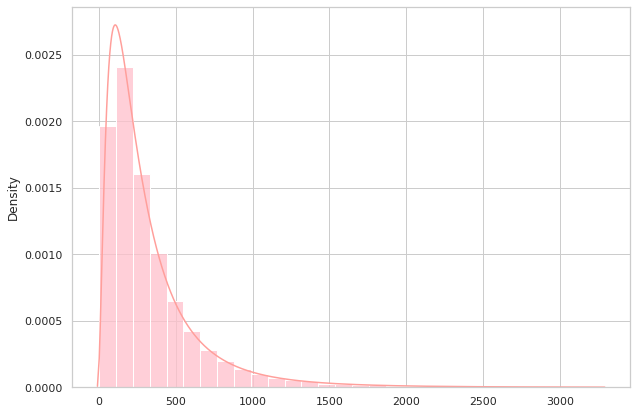

In [37]:
# Inverse transform data sampling for our distribution
plt.figure(figsize=(10,7))
params_1 = sp.stats.lognorm.fit(df, loc=1.1, scale=1.1)
x = np.linspace(0.001, 100, 1000)
ppf_1 = sp.stats.lognorm.ppf(x / 100.0, *params_1)
pdf_1 = sp.stats.lognorm.pdf(ppf_1, *params_1)
plt.plot(ppf_1, pdf_1 , 'r')
synthetic_data=ppf_1[1:ppf_1.size-1]
sns.histplot(synthetic_data, kde=False, bins=30, stat='density', palette='Set3', color = 'pink')

In [40]:
np.random.seed(123)
df_synthetic = np.random.choice(synthetic_data, size = 65+22)
df_synthetic

array([ 237.28569097,  169.44024292,  176.58576133,  152.04048347,
       1727.48663478,   67.47659373,  412.75514699,   25.91465196,
        287.6697916 ,   70.69304961,   77.35352631,  271.10001527,
        111.21028711,  407.21857258,   66.66248569,   73.46120597,
        317.92206953,   44.60227693,   56.92610428,  256.18829332,
        923.21143774,  114.89086721,   72.67429409,  188.30035455,
        158.81374076,  570.17962558,  125.63604539,  193.2148894 ,
        296.41233691,  109.00522426,   54.6929413 ,  515.60005951,
        525.98587815,  207.56284505,    7.94197565,  159.21624541,
         40.32038187,  152.04048347,  288.33089446,  265.02309841,
        234.09680081, 1049.17831043,   97.24306122,   81.94645834,
        633.6845413 ,   67.88206894,  175.73635771,  601.235167  ,
         98.71662616,  166.54501351,  613.26097186,  110.84264338,
        311.99075831,  605.98137465,  189.18748305,  139.60707079,
       2133.440356  ,  283.09323797,  351.78590436,  712.85716

In [41]:
# Sorting our data
df_synthetic.sort()
df.sort()
print(df_synthetic.size)
print(df.size)

87
87


NameError: ignored

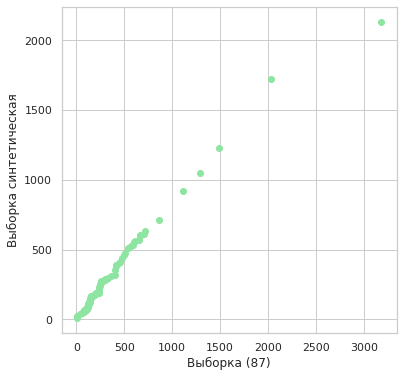

In [49]:
# 
plt.figure(figsize=(6,6))
plt.xlabel('Выборка (87)')
plt.ylabel('Выборка синтетическая')
plt.scatter(df, df_synthetic, color = 'g')

ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")
